# Import Library & Data

In [ ]:
!pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42566 sha256=00e8808def87c4d726f6aec7bdd0799bb1c33d2a5323d8ffcebf2bed0c96edbe
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor_analyzer


In [ ]:
import pandas as pd
from factor_analyzer import FactorAnalyzer

In [4]:
df= pd.read_csv("C:/Users/Admin/Downloads/Dell_file_student.csv")

NameError: name 'pd' is not defined

In [ ]:
df.columns

In [ ]:
df.head()

In [ ]:
df.drop('sr',axis=1,inplace=True)

In [ ]:
# Dropping missing values rows
df.dropna(inplace=True)  # we drop because missing data cannot correlation matrix

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 0 to 371
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   q_1     372 non-null    int64
 1   q_2     372 non-null    int64
 2   q_3     372 non-null    int64
 3   q_4     372 non-null    int64
 4   q_5     372 non-null    int64
 5   q_6     372 non-null    int64
 6   q_7     372 non-null    int64
 7   q_8     372 non-null    int64
 8   q_9     372 non-null    int64
 9   q_10    372 non-null    int64
 10  q_11    372 non-null    int64
 11  q_12    372 non-null    int64
dtypes: int64(12)
memory usage: 37.8 KB


<AxesSubplot:>

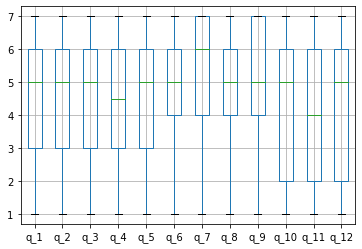

In [ ]:
df.boxplot(column=['q_1', 'q_2', 'q_3', 'q_4', 'q_5', 'q_6', 'q_7', 'q_8', 'q_9', 'q_10','q_11', 'q_12'])

In [ ]:
df.head()

,q_1,q_2,q_3,q_4,q_5,q_6,q_7,q_8,q_9,q_10,q_11,q_12
0,5,6,6,6,7,4,7,6,7,6,6,6
1,2,2,3,2,2,1,1,3,2,4,2,5
2,1,1,3,1,1,5,5,4,4,4,5,5
3,4,3,2,4,3,6,7,7,5,2,1,3
4,2,3,4,4,4,4,4,3,5,4,3,3


# Bartlett Test

* Ho: Correlation matrix is an identity matrix
  *   v/s
* H1:Correlation matrix is not an identity matrix

In [ ]:
Correlation = df.corr()
Correlation.style.applymap(lambda x: 'background-color : yellow' if x >= 0.7 else '')

,q_1,q_2,q_3,q_4,q_5,q_6,q_7,q_8,q_9,q_10,q_11,q_12
q_1,1.000000,0.779565,0.682894,0.664470,0.437591,0.312860,0.413689,0.490261,0.445943,0.374342,0.358890,0.492610
q_2,0.779565,1.000000,0.720719,0.687041,0.393951,0.271744,0.339831,0.445244,0.420298,0.464947,0.429290,0.540407
q_3,0.682894,0.720719,1.000000,0.830108,0.439241,0.254817,0.349588,0.496111,0.423153,0.389078,0.360897,0.462976
q_4,0.664470,0.687041,0.830108,1.000000,0.456421,0.267692,0.341866,0.520882,0.441449,0.441001,0.412347,0.509119
q_5,0.437591,0.393951,0.439241,0.456421,1.000000,0.425926,0.615750,0.565276,0.644045,0.256850,0.240136,0.275079
q_6,0.312860,0.271744,0.254817,0.267692,0.425926,1.000000,0.727529,0.427923,0.546270,0.124615,0.132056,0.137990
q_7,0.413689,0.339831,0.349588,0.341866,0.615750,0.727529,1.000000,0.619517,0.741217,0.165224,0.155100,0.203706
q_8,0.490261,0.445244,0.496111,0.520882,0.565276,0.427923,0.619517,1.000000,0.631514,0.313286,0.280865,0.296734
q_9,0.445943,0.420298,0.423153,0.441449,0.644045,0.546270,0.741217,0.631514,1.000000,0.304549,0.296322,0.316113
q_10,0.374342,0.464947,0.389078,0.441001,0.256850,0.124615,0.165224,0.313286,0.304549,1.000000,0.887876,0.768885


In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value  ## alpha = 0.05

(3420.8706141196494, 0.0)

* We Reject ho ,
* conclude :- Correlation matrix is not an identity matrix

# Kaiser-Meyer-Olkin (KMO) Test

* measures the suitability of data for factor analysis.
* It determines the adequacy for each observed variable and for the complete model.
* KMO estimates the proportion of variance among all the observed variable.
* KMO values range between 0 and 1. Value of KMO less than 0.5 is considered inadequate.

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
kmo_model

0.8723700952427654

The overall KMO for our data is 0.87, which is excellent. This value indicates that you can proceed with your planned factor analysis.

# Choosing the Number of Factors

* For choosing the number of factors, you can use the Kaiser criterion and scree plot. Both are based on eigenvalues.

In [ ]:
#Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(rotation='varimax',method="principal")
fa.fit(df)
# Check Eigenvalues
eigen_values, vectors = fa.get_eigenvalues()
eigen_values

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\extmath.py:368: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


array([5.96773578, 2.11345101, 1.22356639, 0.6140951 , 0.44070232,
       0.41286486, 0.31356534, 0.25642271, 0.20565811, 0.18872345,
       0.15399638, 0.10921854])

In [ ]:
dd=pd.DataFrame(eigen_values,columns=["Eigen_Values"])
dd['Factor'] = [1,2,3,4,5,6,7,8,9,10,11,12]
dd.head()

,Eigen_Values,Factor
0,5.967736,1
1,2.113451,2
2,1.223566,3
3,0.614095,4
4,0.440702,5


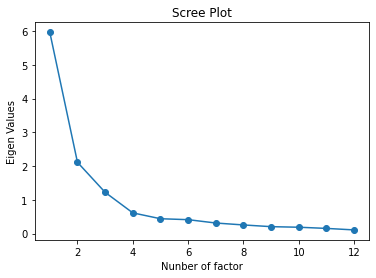

In [ ]:
import matplotlib.pyplot as plt

plt.plot( 'Factor', 'Eigen_Values', data=dd, linestyle='-', marker='o')
plt.xlabel("Nunber of factor")
plt.ylabel("Eigen Values")
plt.title("Scree Plot")
plt.show()


The scree plot method draws a straight line for each factor and its eigenvalues. Number eigenvalues greater than one considered as the number of factors.

Here, you can see only for 3-factors eigenvalues are greater than one. It means we need to choose only 3 factors (or unobserved variables).

# Performing Factor Analysis


In [ ]:
# Create factor analysis object and perform factor analysis
aa=FactorAnalyzer(n_factors=3,rotation='varimax',method="principal")

In [ ]:
model=aa.fit(df)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\extmath.py:368: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


# Correlation Matrix

In [ ]:
data_loading=df.columns.to_list()
data_loading

['q_1',
 'q_2',
 'q_3',
 'q_4',
 'q_5',
 'q_6',
 'q_7',
 'q_8',
 'q_9',
 'q_10',
 'q_11',
 'q_12']

In [ ]:
Correlation=pd.DataFrame(model.corr_,index=data_loading,columns=data_loading)
#round(Correlation,3)
Correlation.style.applymap(lambda x: 'background-color : yellow' if x >= 0.7 else '')

,q_1,q_2,q_3,q_4,q_5,q_6,q_7,q_8,q_9,q_10,q_11,q_12
q_1,1.000000,0.779565,0.682894,0.664470,0.437591,0.312860,0.413689,0.490261,0.445943,0.374342,0.358890,0.492610
q_2,0.779565,1.000000,0.720719,0.687041,0.393951,0.271744,0.339831,0.445244,0.420298,0.464947,0.429290,0.540407
q_3,0.682894,0.720719,1.000000,0.830108,0.439241,0.254817,0.349588,0.496111,0.423153,0.389078,0.360897,0.462976
q_4,0.664470,0.687041,0.830108,1.000000,0.456421,0.267692,0.341866,0.520882,0.441449,0.441001,0.412347,0.509119
q_5,0.437591,0.393951,0.439241,0.456421,1.000000,0.425926,0.615750,0.565276,0.644045,0.256850,0.240136,0.275079
q_6,0.312860,0.271744,0.254817,0.267692,0.425926,1.000000,0.727529,0.427923,0.546270,0.124615,0.132056,0.137990
q_7,0.413689,0.339831,0.349588,0.341866,0.615750,0.727529,1.000000,0.619517,0.741217,0.165224,0.155100,0.203706
q_8,0.490261,0.445244,0.496111,0.520882,0.565276,0.427923,0.619517,1.000000,0.631514,0.313286,0.280865,0.296734
q_9,0.445943,0.420298,0.423153,0.441449,0.644045,0.546270,0.741217,0.631514,1.000000,0.304549,0.296322,0.316113
q_10,0.374342,0.464947,0.389078,0.441001,0.256850,0.124615,0.165224,0.313286,0.304549,1.000000,0.887876,0.768885


# Factor Loading Matrix

* value in matix is called loading

In [ ]:
factor=["Factor1 (Z1) ","Factor2 (Z2)","Factor3 (Z3)"]  # array

In [ ]:
loading=pd.DataFrame(model.loadings_,columns=factor,index=data_loading)
loading=loading.abs()
loading.style.applymap(lambda x: 'background-color : yellow' if x > 0.5 else '')

,Factor1 (Z1),Factor2 (Z2),Factor3 (Z3)
q_1,0.283370,0.797474,0.198220
q_2,0.202139,0.811378,0.291854
q_3,0.217943,0.867313,0.180280
q_4,0.236903,0.825936,0.250646
q_5,0.701807,0.318575,0.117705
q_6,0.801855,0.059696,0.025389
q_7,0.911494,0.157053,0.036216
q_8,0.666124,0.398749,0.146076
q_9,0.814908,0.244380,0.188681
q_10,0.111831,0.213406,0.923417


* 0.28 Value is called loading
* q1 -- q4 have high Correlation with Factor 2
* q5 -- q9 have high Correlation with Factor 1
* q10 -- q12 have high Correlation with Factor 3

# Eigen values

In [ ]:
header=["Eigen_Value","Perentage of Variance Explained","Cumulative Perentage of Variance Explained"]

In [ ]:
variance_Explained=pd.DataFrame(model.get_factor_variance(),columns=factor,index=header)
variance_Explained

,Factor1 (Z1),Factor2 (Z2),Factor3 (Z3)
Eigen_Value,3.333242,3.282123,2.689389
Perentage of Variance Explained,0.277770,0.273510,0.224116
Cumulative Perentage of Variance Explained,0.277770,0.551280,0.775396


* 77.54% of variance is explained by 3 Factor

# Communalities & Uniqueness

In [ ]:
communalities=pd.DataFrame(model.get_communalities(),columns=["communalities"],index=data_loading)
communalities ['uniqueness']= model.get_uniquenesses()
round(communalities,2)

,communalities,uniqueness
q_1,0.76,0.24
q_2,0.78,0.22
q_3,0.83,0.17
q_4,0.80,0.20
q_5,0.61,0.39
q_6,0.65,0.35
q_7,0.86,0.14
q_8,0.62,0.38
q_9,0.76,0.24
q_10,0.91,0.09


# Final Transform data
* Data Dimensional Reduction from 12 Variable to 3 Factor  

In [ ]:
df.head()

,q_1,q_2,q_3,q_4,q_5,q_6,q_7,q_8,q_9,q_10,q_11,q_12
0,5,6,6,6,7,4,7,6,7,6,6,6
1,2,2,3,2,2,1,1,3,2,4,2,5
2,1,1,3,1,1,5,5,4,4,4,5,5
3,4,3,2,4,3,6,7,7,5,2,1,3
4,2,3,4,4,4,4,4,3,5,4,3,3


In [ ]:
output=pd.DataFrame(model.fit_transform(df),columns=['Data Factor1','Data Factor2','Data Factor3'])
output

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\extmath.py:368: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


,Data Factor1,Data Factor2,Data Factor3
0,0.603136,0.662044,0.716979
1,-2.677555,-0.439755,0.124014
2,-0.395612,-1.986818,0.765420
3,0.863370,-0.611397,-1.125200
4,-0.671417,-0.465865,-0.213106
...,...,...,...
367,0.356767,0.003556,0.325964
368,-0.958443,0.287226,1.111528
369,1.334944,0.000583,0.934120
370,1.181801,1.486922,-0.157216


In [ ]:
print("original shape:   ", df.shape)
print("transformed shape:", output.shape)

original shape:    (372, 12)
transformed shape: (372, 3)


# To check the Factor Component is uncorrelated / independent

In [ ]:
round(output.corr(),5)

,Data Factor1,Data Factor2,Data Factor3
Data Factor1,1.0,-0.0,-0.0
Data Factor2,-0.0,1.0,0.0
Data Factor3,-0.0,0.0,1.0


* Correlation between Data Factor 1 & Data Factor 2 is 0% , which indicate they are independent

* Factor 1 = q5 - q9 == Risk taker
* Factor 2 = q1 - q4 == Promotor / Informer
* Factor 3 = q10 - q12 == Technical Expert

# Finished